## SEAI 2022 - Python - Lab 7
# ESDA & Spatial Econometrics Models

Vincenzo Nardelli - vincnardelli@gmail.com - https://github.com/vincnardelli



Before to start... install Python Libraries!

In [ ]:
! pip install pysal

     |████████████████████████████████| 2.4MB 33.2MB/s 
     |████████████████████████████████| 112kB 58.0MB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 
     |████████████████████████████████| 92kB 11.8MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 215kB 52.3MB/s 
     |████████████████████████████████| 5.7MB 38.5MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 143kB 62.8MB/s 
     |████████████████████████████████| 235kB 61.9MB/s 
     |████████████████████████████████| 235kB 44.8MB/s 
     |████████████████████████████████| 57.4MB 74kB/s 
     |████████████████████████████████| 1.0MB 31.4MB/s 
     |████████████████████████████████| 1.0MB 34.3MB/s 
     |████████████████████████████████| 2.0MB 32.0MB/s 
     |████████████████████████████████| 19.3MB 249kB/s 
    

     |████████████████████████████████| 245kB 33.4MB/s 
     |████████████████████████████████| 245kB 46.6MB/s 
     |████████████████████████████████| 133kB 43.6MB/s 
  Created wheel for pyrestcli: filename=pyrestcli-0.6.11-cp37-none-any.whl size=8499 sha256=d2a6a9fdc7900eb4dcd13645cba762251142b431194b90685b25733427c159af
  Stored in directory: /root/.cache/pip/wheels/2f/bb/11/396a62e2d1e718f2bfb02b66726240fbc8d98640bfc0cf1688
Successfully built pyrestcli
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.25.11 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.26.5
    Uninstalling urllib3-1.26.5:
      Successfully uninstalled urllib3-1.26.5
     |████████████████████████████████| 133kB 26.8MB/s 
ERROR: pysal 2.4.0 has requirement urllib3>=1.26, but you'll have urllib3 1.22 which is incompatible.
ERROR: datascience 0.10.6 has requirement 

Remember to restart the runtime to load correctly the installed libraries!

Now, we download from the web the dataset for this lab.

In [ ]:
! wget https://geodacenter.github.io/data-and-lab//data/columbus.zip
! unzip columbus.zip

--2021-06-11 10:11:30--  https://geodacenter.github.io/data-and-lab//data/columbus.zip
Resolving geodacenter.github.io (geodacenter.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to geodacenter.github.io (geodacenter.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472230 (461K) [application/zip]
Saving to: ‘columbus.zip’

columbus.zip        100%[===================>] 461.16K  --.-KB/s    in 0.01s   

2021-06-11 10:11:30 (43.2 MB/s) - ‘columbus.zip’ saved [472230/472230]

Archive:  columbus.zip
   creating: columbus/
  inflating: columbus/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/columbus/
  inflating: __MACOSX/columbus/._.DS_Store  
  inflating: columbus/columbus.csv   
  inflating: __MACOSX/columbus/._columbus.csv  
  inflating: columbus/columbus.dbf   
  inflating: __MACOSX/columbus/._columbus.dbf  
   creating: columbus/columbus.gdb/
  inflating: columbus/columbus.gdb/a00000001.

Let's start!

## Explorative Spatial Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd

columbus = gpd.read_file("columbus/columbus.shp")
columbus.head()

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


,AREA,PERIMETER,COLUMBUS_,COLUMBUS_I,POLYID,NEIG,HOVAL,INC,CRIME,OPEN,PLUMB,DISCBD,X,Y,NSA,NSB,EW,CP,THOUS,NEIGNO,geometry
0,0.309441,2.440629,2,5,1,5,80.467003,19.531,15.725980,2.850747,0.217155,5.03,38.799999,44.070000,1.0,1.0,1.0,0.0,1000.0,1005.0,"POLYGON ((8.62413 14.23698, 8.55970 14.74245, ..."
1,0.259329,2.236939,3,1,2,1,44.567001,21.232,18.801754,5.296720,0.320581,4.27,35.619999,42.380001,1.0,1.0,0.0,0.0,1000.0,1001.0,"POLYGON ((8.25279 14.23694, 8.28276 14.22994, ..."
2,0.192468,2.187547,4,6,3,6,26.350000,15.956,30.626781,4.534649,0.374404,3.89,39.820000,41.180000,1.0,1.0,1.0,0.0,1000.0,1006.0,"POLYGON ((8.65331 14.00809, 8.81814 14.00205, ..."
3,0.083841,1.427635,5,2,4,2,33.200001,4.477,32.387760,0.394427,1.186944,3.70,36.500000,40.520000,1.0,1.0,0.0,0.0,1000.0,1002.0,"POLYGON ((8.45950 13.82035, 8.47341 13.83227, ..."
4,0.488888,2.997133,6,7,5,7,23.225000,11.252,50.731510,0.405664,0.624596,2.83,40.009998,38.000000,1.0,1.0,1.0,0.0,1000.0,1007.0,"POLYGON ((8.68527 13.63952, 8.67758 13.72221, ..."


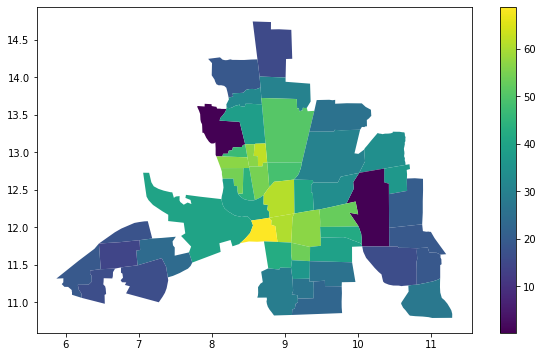

In [ ]:
columbus.plot(column="CRIME", figsize=(10, 6),legend=True)

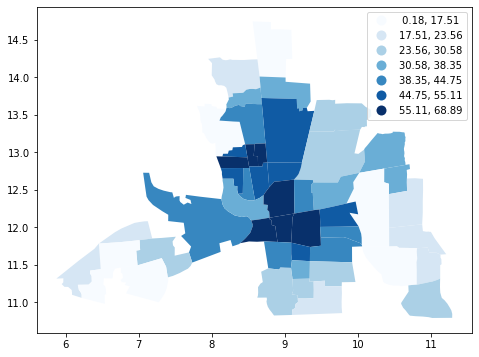

In [ ]:
columbus.plot(column="CRIME", figsize=(10, 6), scheme='Quantiles', k=7, cmap='Blues',legend=True);

Let's create the weight matrix

In [ ]:
from libpysal.weights import Queen
w = Queen.from_dataframe(columbus)
w.transform = 'r'

### Spatial Lag

Compute the lagged value from the W matrix

$y l a g_{i}=\sum_{j} w_{i, j} y_{j}$

In [ ]:
from libpysal.weights import lag_spatial

y = columbus['CRIME']
ylag = lag_spatial(w, y)

ylag

array([24.7142675 , 26.24684033, 29.411751  , 34.64647575, 40.4653275 ,
       40.6237135 , 49.728447  , 41.49913083, 36.9477815 , 25.328384  ,
       49.857447  , 43.25009117, 38.093982  , 42.82053817, 50.10508383,
       52.36547225, 18.09104533, 51.18116975, 46.442163  , 32.4463615 ,
       43.72131433, 35.90408433, 18.74605433, 54.90555729, 49.97125037,
       48.62930967, 33.20419825, 47.42423011, 51.79066157, 48.5733284 ,
       19.12681567, 13.8546865 , 37.27826625, 22.1371835 , 33.098551  ,
       18.7549056 , 50.99421883, 43.65270583, 16.171101  , 21.0544898 ,
       21.06991733, 19.139792  , 36.16118067, 35.747272  , 32.07386125,
       16.7032095 , 17.5732225 , 28.5489635 , 27.21200567])

In [ ]:
columbus['CRIME_W'] = ylag

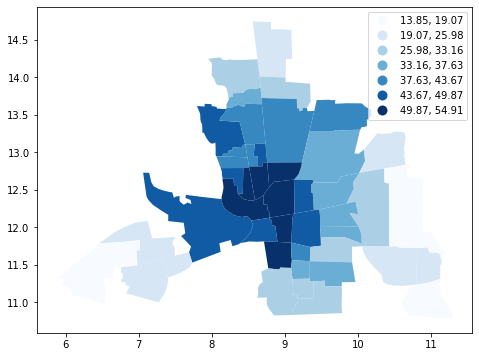

In [ ]:
columbus.plot(column="CRIME_W", figsize=(10, 6), scheme='Quantiles', k=7, cmap='Blues',legend=True)

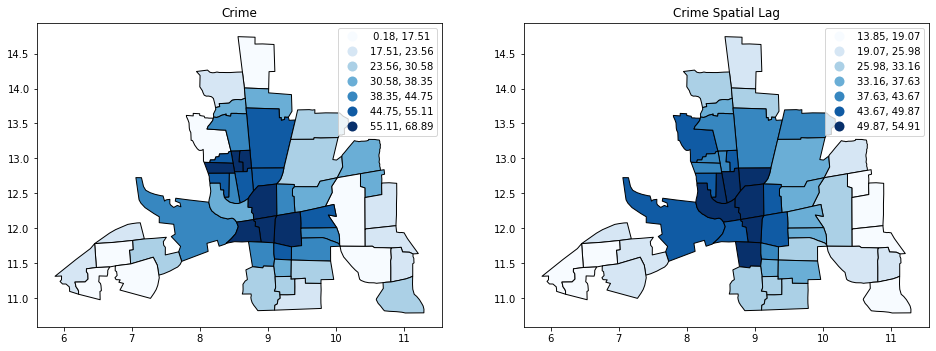

In [ ]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(1,2,figsize=(16, 8))
columbus.plot(column='CRIME', ax=ax[0], edgecolor='k',
        scheme='Quantiles', k=7, cmap='Blues',legend=True)
ax[0].set_title("Crime")
columbus.plot(column='CRIME_W', ax=ax[1], edgecolor='k',
        scheme='Quantiles', k=7, cmap='Blues',legend=True)
ax[1].set_title("Crime Spatial Lag");

### Moran's Index
Now we can compute the Moran's Index

In [ ]:
from esda.moran import Moran
mi = Moran(y, w)
mi.I

0.5001885571828611

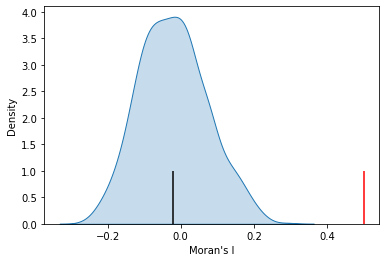

In [ ]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I");

In [ ]:
mi.p_norm

1.7988309952698955e-08

In [ ]:
mi.p_sim

0.001

https://pysal.org/esda/generated/esda.Moran.html

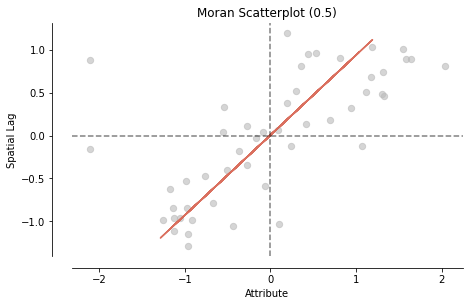

In [ ]:
from splot.esda import moran_scatterplot
moran_scatterplot(mi, aspect_equal=True);

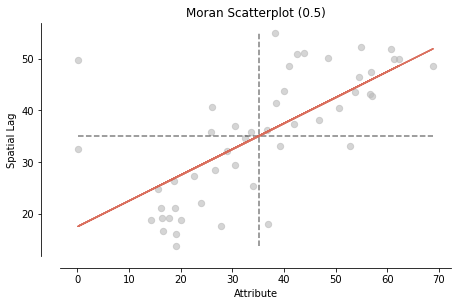

In [ ]:
moran_scatterplot(mi, aspect_equal=True, zstandard=False);

### Local Moran

We can also compute the local moran in a similar way



In [ ]:
from esda.moran import Moran_Local
mi_local = Moran_Local(y, w)

In [ ]:
mi_local.p_sim

array([0.18 , 0.145, 0.232, 0.46 , 0.153, 0.346, 0.055, 0.16 , 0.388,
       0.118, 0.014, 0.098, 0.342, 0.11 , 0.007, 0.001, 0.033, 0.029,
       0.116, 0.242, 0.185, 0.435, 0.044, 0.001, 0.001, 0.009, 0.442,
       0.008, 0.001, 0.015, 0.044, 0.006, 0.391, 0.061, 0.39 , 0.008,
       0.006, 0.085, 0.026, 0.018, 0.072, 0.083, 0.426, 0.474, 0.367,
       0.048, 0.067, 0.226, 0.206])

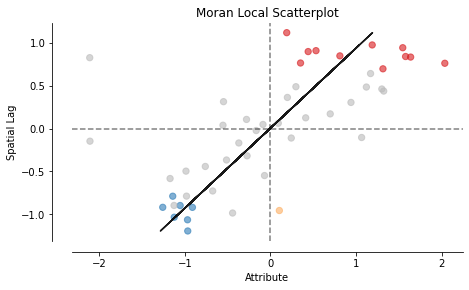

In [ ]:
moran_scatterplot(mi_local, p=0.05);

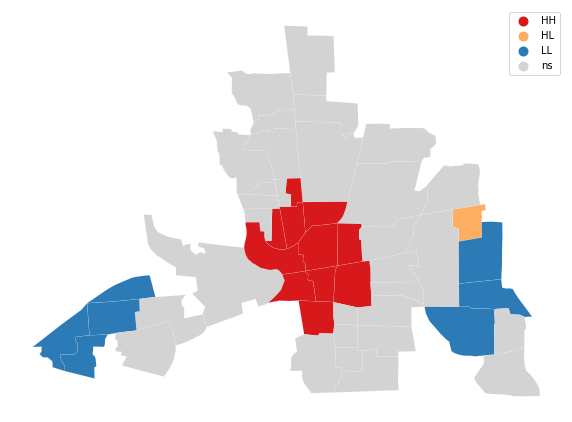

In [ ]:
from splot.esda import lisa_cluster

lisa_cluster(mi_local, columbus, p=0.05, figsize = (10,10));

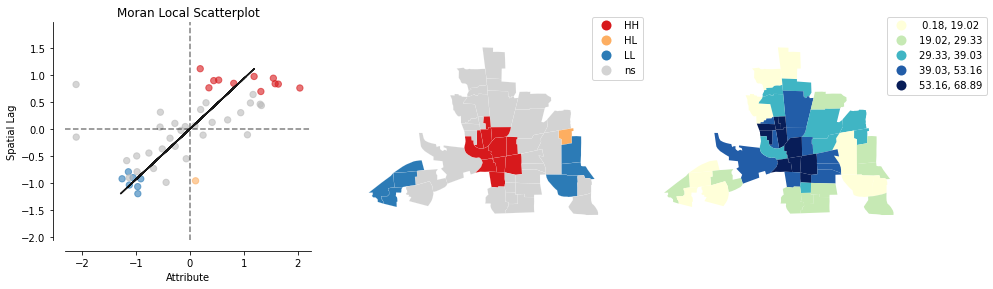

In [ ]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(mi_local, columbus, 'CRIME');

## Spatial Econometrics Models
Let's start with some data manipulation with numpy

In [ ]:
columbus['CRIME']

0     15.725980
1     18.801754
2     30.626781
3     32.387760
4     50.731510
5     26.066658
6      0.178269
7     38.425858
8     30.515917
9     34.000835
10    62.275448
11    56.705669
12    46.716129
13    57.066132
14    48.585487
15    54.838711
16    36.868774
17    43.962486
18    54.521965
19     0.223797
20    40.074074
21    33.705048
22    20.048504
23    38.297871
24    61.299175
25    40.969742
26    52.794430
27    56.919785
28    60.750446
29    68.892044
30    17.677214
31    19.145592
32    41.968163
33    23.974028
34    39.175053
35    14.305556
36    42.445076
37    53.710938
38    19.100863
39    16.241299
40    18.905146
41    16.491890
42    36.663612
43    25.962263
44    29.028488
45    16.530533
46    27.822861
47    26.645266
48    22.541491
Name: CRIME, dtype: float64

In [ ]:
columbus['CRIME'].values

array([15.72598 , 18.801754, 30.626781, 32.38776 , 50.73151 , 26.066658,
        0.178269, 38.425858, 30.515917, 34.000835, 62.275448, 56.705669,
       46.716129, 57.066132, 48.585487, 54.838711, 36.868774, 43.962486,
       54.521965,  0.223797, 40.074074, 33.705048, 20.048504, 38.297871,
       61.299175, 40.969742, 52.79443 , 56.919785, 60.750446, 68.892044,
       17.677214, 19.145592, 41.968163, 23.974028, 39.175053, 14.305556,
       42.445076, 53.710938, 19.100863, 16.241299, 18.905146, 16.49189 ,
       36.663612, 25.962263, 29.028488, 16.530533, 27.822861, 26.645266,
       22.541491])

In [ ]:
y = columbus['CRIME'].values
y_name = 'CRIME'

In [ ]:
x = np.array([columbus.INC]).T
x_name = 'INC'
x

array([[19.531   ],
       [21.232   ],
       [15.956   ],
       [ 4.477   ],
       [11.252   ],
       [16.028999],
       [ 8.438   ],
       [11.337   ],
       [17.586   ],
       [13.598   ],
       [ 7.467   ],
       [10.048   ],
       [ 9.549   ],
       [ 9.963   ],
       [ 9.873   ],
       [ 7.625   ],
       [ 9.798   ],
       [13.185   ],
       [11.618   ],
       [31.07    ],
       [10.655   ],
       [11.709   ],
       [21.155001],
       [14.236   ],
       [ 8.461   ],
       [ 8.085   ],
       [10.822   ],
       [ 7.856   ],
       [ 8.681   ],
       [13.906   ],
       [16.940001],
       [18.941999],
       [ 9.918   ],
       [14.948   ],
       [12.814   ],
       [18.739   ],
       [17.017   ],
       [11.107   ],
       [18.476999],
       [29.833   ],
       [22.207001],
       [25.872999],
       [13.38    ],
       [16.961   ],
       [14.135   ],
       [18.323999],
       [18.950001],
       [11.813   ],
       [18.796   ]])

In [ ]:
X_names = ['INC', 'HOVAL']
X = columbus[X_names].values
X

array([[19.531   , 80.467003],
       [21.232   , 44.567001],
       [15.956   , 26.35    ],
       [ 4.477   , 33.200001],
       [11.252   , 23.225   ],
       [16.028999, 28.75    ],
       [ 8.438   , 75.      ],
       [11.337   , 37.125   ],
       [17.586   , 52.599998],
       [13.598   , 96.400002],
       [ 7.467   , 19.700001],
       [10.048   , 19.9     ],
       [ 9.549   , 41.700001],
       [ 9.963   , 42.900002],
       [ 9.873   , 18.      ],
       [ 7.625   , 18.799999],
       [ 9.798   , 41.75    ],
       [13.185   , 60.      ],
       [11.618   , 30.6     ],
       [31.07    , 81.266998],
       [10.655   , 19.975   ],
       [11.709   , 30.450001],
       [21.155001, 47.733002],
       [14.236   , 53.200001],
       [ 8.461   , 17.9     ],
       [ 8.085   , 20.299999],
       [10.822   , 34.099998],
       [ 7.856   , 22.85    ],
       [ 8.681   , 32.5     ],
       [13.906   , 22.5     ],
       [16.940001, 31.799999],
       [18.941999, 40.299999],
       [

### OLS

In [ ]:
from spreg import OLS
ols = OLS(y=y, x=x)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :     dep_var                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           2
S.D. dependent var  :     16.7321                Degrees of Freedom    :          47
R-squared           :      0.4838
Adjusted R-squared  :      0.4729
Sum squared residual:    6936.202                F-statistic           :     44.0579
Sigma-square        :     147.579                Prob(F-statistic)     :   2.901e-08
S.E. of regression  :      12.148                Log likelihood        :    -190.869
Sigma-square ML     :     141.555                Akaike info criterion :     385.738
S.E of regression ML:     11.8977                Schwarz criterion     :     389.521

-----------------------------------------------------------------------------

In [ ]:
?ols

In [ ]:
ols = OLS(y=y, x=x, 
          name_y=y_name, name_x=[x_name], name_ds='columbus')
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    columbus
Weights matrix      :        None
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           2
S.D. dependent var  :     16.7321                Degrees of Freedom    :          47
R-squared           :      0.4838
Adjusted R-squared  :      0.4729
Sum squared residual:    6936.202                F-statistic           :     44.0579
Sigma-square        :     147.579                Prob(F-statistic)     :   2.901e-08
S.E. of regression  :      12.148                Log likelihood        :    -190.869
Sigma-square ML     :     141.555                Akaike info criterion :     385.738
S.E of regression ML:     11.8977                Schwarz criterion     :     389.521

-----------------------------------------------------------------------------

Array of betas

In [ ]:
ols.betas

array([[64.46322833],
       [-2.04066292]])

Array of residuals

In [ ]:
ols.u

array([[ -8.88106093],
       [ -2.33411931],
       [ -1.27562985],
       [-22.93942046],
       [  9.2298208 ],
       [ -5.6867865 ],
       [-47.06584565],
       [ -2.90237486],
       [  1.9397867 ],
       [ -2.713459  ],
       [ 13.04984966],
       [ 12.74702165],
       [  1.73919085],
       [ 12.9340283 ],
       [  4.26972364],
       [  5.9355374 ],
       [ -7.60003908],
       [  6.40539821],
       [ 13.76715842],
       [ -0.83603454],
       [ -2.64589096],
       [ -6.86405825],
       [ -1.24449831],
       [  2.88551994],
       [ 14.1019956 ],
       [ -6.99472666],
       [ 10.41525574],
       [  8.48800454],
       [ 14.00221244],
       [ 32.80627417],
       [-12.2171825 ],
       [ -6.66340142],
       [ -2.25577053],
       [ -9.98537107],
       [  0.86087927],
       [-11.91768995],
       [ 12.70780851],
       [ 11.91335267],
       [ -7.65703868],
       [ 12.65716743],
       [ -0.24107892],
       [  4.82673124],
       [ -0.49554652],
       [ -3

Predicted values

In [ ]:
ols.predy

array([[24.60704093],
       [21.13587331],
       [31.90241085],
       [55.32718046],
       [41.5016892 ],
       [31.7534445 ],
       [47.24411465],
       [41.32823286],
       [28.5761303 ],
       [36.714294  ],
       [49.22559834],
       [43.95864735],
       [44.97693815],
       [44.1321037 ],
       [44.31576336],
       [48.9031736 ],
       [44.46881308],
       [37.55708779],
       [40.75480658],
       [ 1.05983154],
       [42.71996496],
       [40.56910625],
       [21.29300231],
       [35.41235106],
       [47.1971794 ],
       [47.96446866],
       [42.37917426],
       [48.43178046],
       [46.74823356],
       [36.08576983],
       [29.8943965 ],
       [25.80899342],
       [44.22393353],
       [33.95939907],
       [38.31417373],
       [26.22324595],
       [29.73726749],
       [41.79758533],
       [26.75790168],
       [ 3.58413157],
       [19.14622492],
       [11.66515876],
       [37.15915852],
       [29.85154462],
       [35.61845802],
       [27

$R^2$


In [ ]:
ols.r2

0.48384513293999487

Log-likelihood


In [ ]:
ols.logll

-190.8688784063158

Jarque Bera

In [ ]:
ols.jarque_bera

{'df': 2, 'jb': 36.5488718687176, 'pvalue': 1.1574795154584871e-08}

https://spreg.readthedocs.io/en/latest/generated/spreg.OLS.html

### Moran's I on residual
Using the W matrix in combination with the OLS is possible to compute the Moran's I on the residuals

In [ ]:
from spreg import MoranRes
m = MoranRes(ols, w, z=True)

Value of the Moran’s I statistic:

In [ ]:
print(round(m.I,4))

0.1724


Value of the Moran’s I expectation:

In [ ]:
print(round(m.eI,4))

-0.0301


Value of the Moran’s I variance:

In [ ]:
print(round(m.vI,4))

0.0082


Value of the Moran’s I standardized value. This is distributed as a standard Normal(0, 1)

In [ ]:
print(round(m.zI,4))

2.237


P-value of the standardized Moran’s I value (z):

In [ ]:
print(round(m.p_norm,4))

0.0253


Otherwise, the preferred approach is to perform all the test usign OLS function:

In [ ]:
ols = OLS(y=y, x=x, w=w, 
          name_y=y_name, name_x = [x_name], name_ds='columbus', 
          white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    columbus
Weights matrix      :     unknown
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           2
S.D. dependent var  :     16.7321                Degrees of Freedom    :          47
R-squared           :      0.4838
Adjusted R-squared  :      0.4729
Sum squared residual:    6936.202                F-statistic           :     44.0579
Sigma-square        :     147.579                Prob(F-statistic)     :   2.901e-08
S.E. of regression  :      12.148                Log likelihood        :    -190.869
Sigma-square ML     :     141.555                Akaike info criterion :     385.738
S.E of regression ML:     11.8977                Schwarz criterion     :     389.521

-----------------------------------------------------------------------------

In [ ]:
ols = OLS(y=y, x=X, w=w, 
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus', 
          white_test=True, spat_diag=True, moran=True)
print(ols.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           3
S.D. dependent var  :     16.7321                Degrees of Freedom    :          46
R-squared           :      0.5524
Adjusted R-squared  :      0.5329
Sum squared residual:    6014.893                F-statistic           :     28.3856
Sigma-square        :     130.759                Prob(F-statistic)     :   9.341e-09
S.E. of regression  :      11.435                Log likelihood        :    -187.377
Sigma-square ML     :     122.753                Akaike info criterion :     380.754
S.E of regression ML:     11.0794                Schwarz criterion     :     386.430

-----------------------------------------------------------------------------

### How to select the spatial specification?

Spatial specification search (Anselin, 2015)

"However, this decision rule needs to be applied with caution, since there may not be sufficient evidence to clearly select one alternative over another"

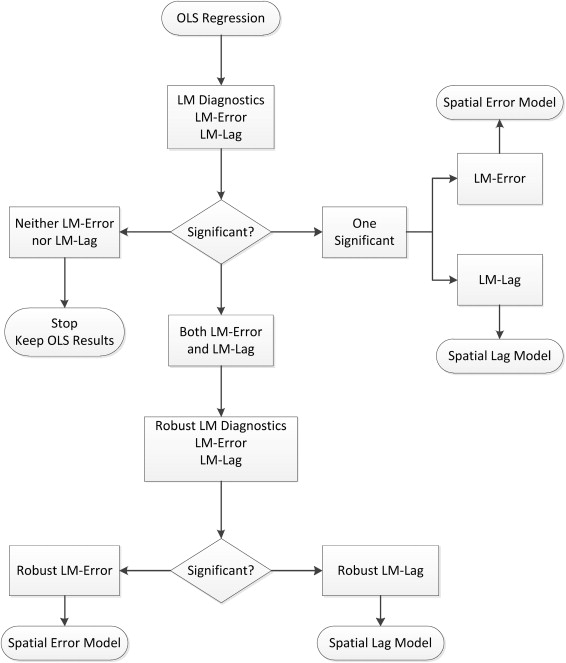



### Spatial Lag

Reference: Anselin, 1998

In [ ]:
from spreg import ML_Lag
lag = ML_Lag(y=y, x=X, w=w, 
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus')
print(lag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           4
S.D. dependent var  :     16.7321                Degrees of Freedom    :          45
Pseudo R-squared    :      0.6473
Spatial Pseudo R-squared:  0.5806
Sigma-square ML     :      96.857                Log likelihood        :    -182.674
S.E of regression   :       9.842                Akaike info criterion :     373.348
                                                 Schwarz criterion     :     380.915

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
from spreg import GM_Lag
lag = GM_Lag(y=y, x=X, w=w,
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus')
print(lag.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIAL TWO STAGE LEAST SQUARES
--------------------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           4
S.D. dependent var  :     16.7321                Degrees of Freedom    :          45
Pseudo R-squared    :      0.6494
Spatial Pseudo R-squared:  0.5786

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      43.9631909      10.7680847       4.0827308       0.0000445
                 INC      -1.0096372       0.3723948      -2.7112007       0.0067040
               HOVAL      -0.2657935       0.0886026      -

### Spatial Error

Reference: Anselin, 1998

In [ ]:
from spreg import ML_Error
error = ML_Error(y=y, x=X, w=w, 
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus')
print(error.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL ERROR (METHOD = FULL)
-------------------------------------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           3
S.D. dependent var  :     16.7321                Degrees of Freedom    :          46
Pseudo R-squared    :      0.5362
Sigma-square ML     :      97.674                Log likelihood        :    -183.749
S.E of regression   :       9.883                Akaike info criterion :     373.499
                                                 Schwarz criterion     :     379.174

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
-----------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:770: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


Reference: Kelejian and Prucha (1998, 1999) 

In [ ]:
from spreg import GM_Error
error = GM_Error(y=y, x=X, w=w, 
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus')
print(error.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED LEAST SQUARES
---------------------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           3
S.D. dependent var  :     16.7321                Degrees of Freedom    :          46
Pseudo R-squared    :      0.5453

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      62.9187786       5.0108898      12.5564083       0.0000000
                 INC      -1.1500724       0.3347166      -3.4359582       0.0005905
               HOVAL      -0.2982308       0.0948124      -3.1454814       0.0016581
      

### Lag + Error

Reference: Kelejian and Prucha (1998, 1999)

In [ ]:
from spreg import GM_Combo
combo = GM_Combo(y=y, x=X, w=w, 
          name_y=y_name, name_x = X_names, name_w="Q row std", name_ds='columbus')
print(combo.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: SPATIALLY WEIGHTED TWO STAGE LEAST SQUARES
-------------------------------------------------------------
Data set            :    columbus
Weights matrix      :   Q row std
Dependent Variable  :       CRIME                Number of Observations:          49
Mean dependent var  :     35.1288                Number of Variables   :           4
S.D. dependent var  :     16.7321                Degrees of Freedom    :          45
Pseudo R-squared    :      0.6494
Spatial Pseudo R-squared:  0.5787

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT      43.9717784      10.7831309       4.0778303       0.0000455
                 INC      -1.0121280       0.3729276      -2.7140070       0.0066475
               HOVAL      -0.2651583 

In [ ]:
combo